# Laboratorio 1

Juan Pablo Rodas

Carnet 23007521

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Problema 1

In [14]:
def colorImage(imagen, color):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    monocromo = np.zeros((alto,ancho,3))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = imagen[i,j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            if (color==1):
                monocromo[i,j] = [0,0,blue]
            elif (color==2):
                monocromo[i,j] = [0,green,0]
            elif (color==3):
                monocromo[i,j] = [red,0,0]
            elif (color==10):
                monocromo[i,j] = [red,green,0]
            elif (color==20):
                monocromo[i,j] = [0,green,blue]
            elif (color==30):
                monocromo[i,j] = [red,0,blue]

    return monocromo

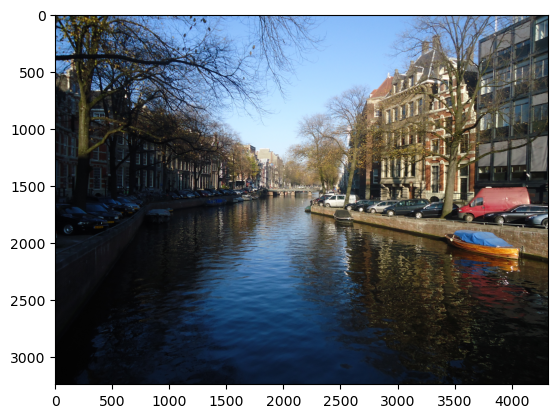

In [9]:
img = cv2.imread("ImagenPrueba.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

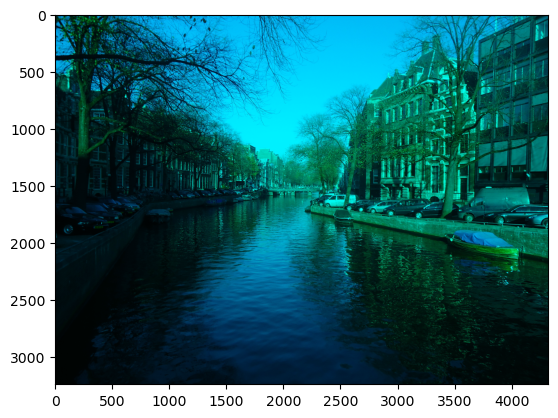

In [18]:
mnc_img2=colorImage(img,20)
cv2.imwrite("monocromo.jpg", mnc_img2)
img2 = cv2.imread("monocromo.jpg")
plt.imshow(img2)
plt.show()

## Problema 2

In [26]:
def reColor(img_red, img_blue, img_green):
    alto = img_red.shape[0]
    ancho = img_red.shape[1]
    recolor = np.zeros((alto,ancho,3))

    for i in range(0, alto):
        for j in range(0, ancho):
            
            blue = img_blue[i,j]
            green = img_green[i,j]
            red = img_red[i,j]

            recolor[i,j]=[red,green,blue]

    return recolor

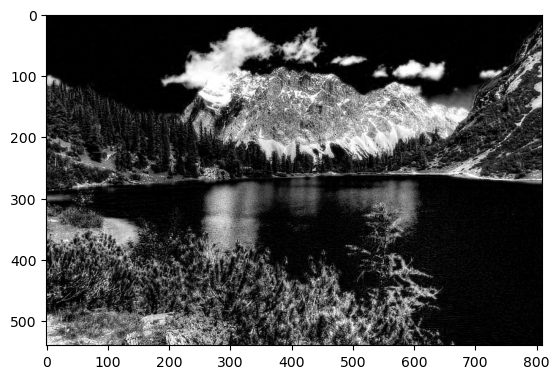

In [34]:
img_red=cv2.imread('Lab1/imagen1/imagen1_salida_gray_rojo.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_red,cmap='gray')
plt.show()

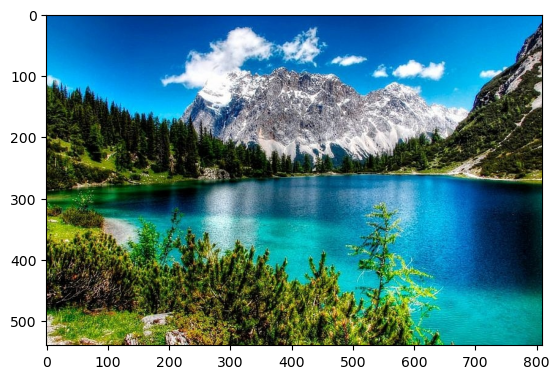

In [31]:
img_red=cv2.imread('Lab1/imagen1/imagen1_salida_gray_rojo.jpg',cv2.IMREAD_GRAYSCALE)
img_blue=cv2.imread('Lab1/imagen1/imagen1_salida_gray_azul.jpg',cv2.IMREAD_GRAYSCALE)
img_green=cv2.imread('Lab1/imagen1/imagen1_salida_gray_verde.jpg',cv2.IMREAD_GRAYSCALE)

imgColor = reColor(img_red, img_blue, img_green)
cv2.imwrite("reColor.jpg", imgColor)
img3 = cv2.imread("reColor.jpg")
plt.imshow(img3)
plt.show()


## Problema 3

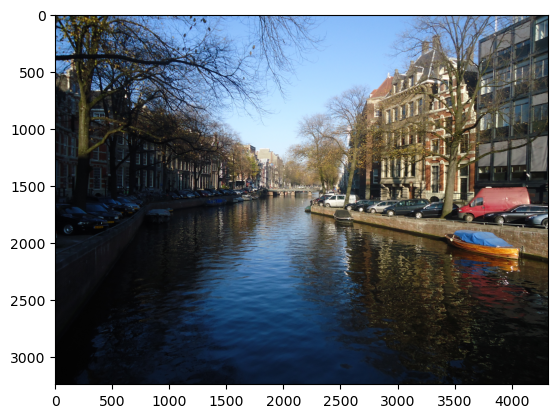

In [35]:
plt.imshow(img)
plt.show()

In [72]:
def grayScale3D(imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    gray_red = np.zeros((alto,ancho,1))
    gray_blue = np.zeros((alto,ancho,1))
    gray_green = np.zeros((alto,ancho,1))
    gris_aritmetico = np.zeros((alto,ancho,1))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = imagen[i,j]

            gray_blue[i,j] = pixel[2]
            gray_green[i,j] = pixel[1]
            gray_red[i,j] = pixel[0]

            gris_aritmetico[i,j] = np.mean(pixel)

    return gray_red, gray_blue, gray_green, gris_aritmetico

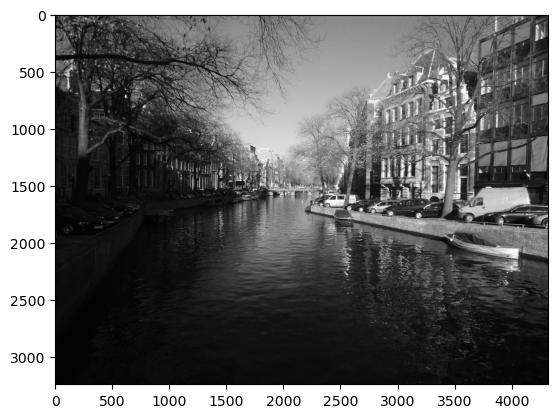

In [40]:
gray_red, gray_blue, gray_green = grayScale3D(img)
cv2.imwrite("img_gray_red.jpg", gray_red)
cv2.imwrite("img_gray_green.jpg", gray_blue)
cv2.imwrite("img_gray_blue.jpg", gray_green)

# Rojo
img3 = cv2.imread("img_gray_red.jpg")
plt.imshow(img3)
plt.show()

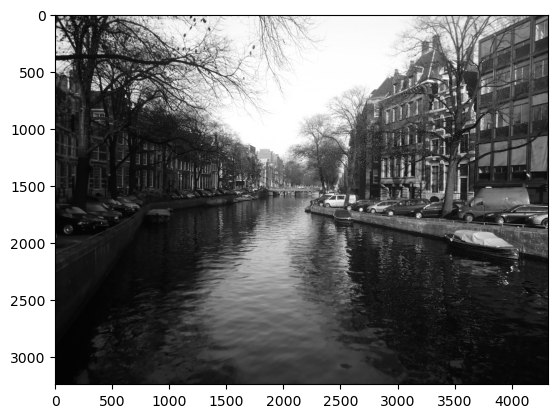

In [86]:
# verde
img4 = cv2.imread("img_gray_green.jpg")
plt.imshow(img4)
plt.show()

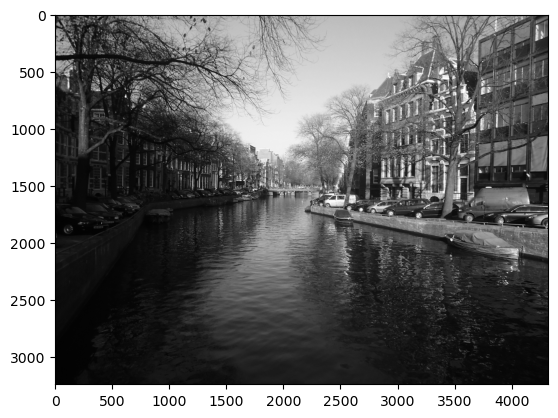

In [87]:
# azul
img5 = cv2.imread("img_gray_blue.jpg")
plt.imshow(img5)
plt.show()

## Problema 4

In [84]:
def colorHist(imagen):
    gray_red, gray_blue, gray_green, gris_aritmetico = grayScale3D(img)
    cv2.imwrite("img_gray_red.jpg", gray_red)
    cv2.imwrite("img_gray_green.jpg", gray_blue)
    cv2.imwrite("img_gray_blue.jpg", gray_green)
    cv2.imwrite("img_gris_aritmetico.jpg", gris_aritmetico)

    imgred = cv2.imread("img_gray_red.jpg")
    imggreen = cv2.imread("img_gray_green.jpg")
    imgblue = cv2.imread("img_gray_blue.jpg")
    imggray = cv2.imread("img_gris_aritmetico.jpg")

    fig, axs = plt.subplots(4, 1, figsize=(6, 8), sharex=True)

    histred = cv2.calcHist([imgred],[0],None,[256],[0,256])
    mean_r = imgred.mean()
    axs[0].plot(histred, color='red')
    axs[0].axvline(x=mean_r, color='black', linestyle='dashed', linewidth=2)
    axs[0].set_title("Histograma rojo")

    histgreen = cv2.calcHist([imggreen],[0],None,[256],[0,256])
    mean_g = imggreen.mean()
    axs[1].plot(histgreen, color='green')
    axs[1].axvline(x=mean_g, color='black', linestyle='dashed', linewidth=2)
    axs[1].set_title("Histograma verde")

    histblue = cv2.calcHist([imgblue],[0],None,[256],[0,256])
    mean_b = imgblue.mean()
    axs[2].plot(histblue, color='blue')
    axs[2].axvline(x=mean_b, color='black', linestyle='dashed', linewidth=2)
    axs[2].set_title("Histograma azul")

    histgray = cv2.calcHist([imggray],[0],None,[256],[0,256])
    mean_gray = imggray.mean()
    axs[3].plot(histgray, color='gray')
    axs[3].axvline(x=mean_gray, color='black', linestyle='dashed', linewidth=2)
    axs[3].set_title("Histograma gris aritmetico")

    plt.tight_layout()
    plt.show()
    

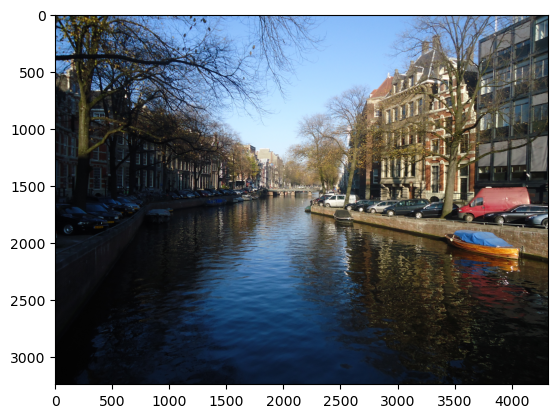

In [64]:
plt.imshow(img)
plt.show()

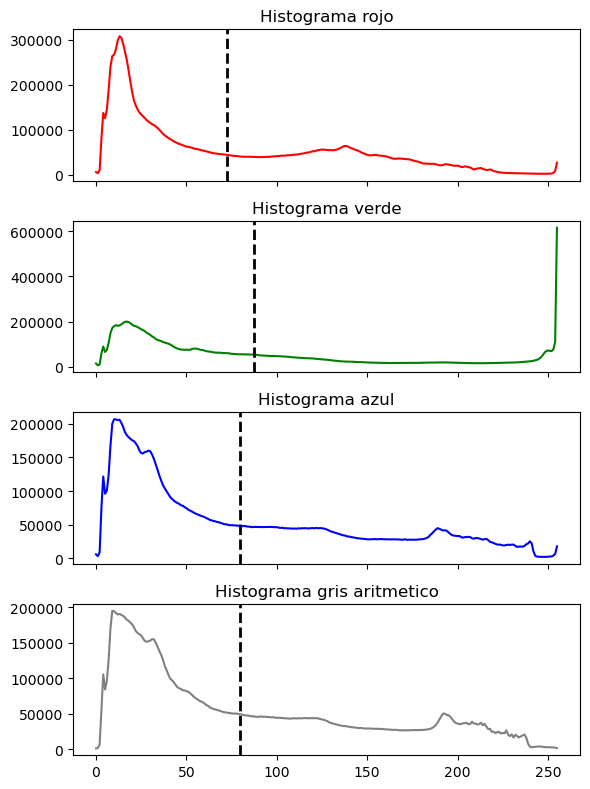

In [85]:
colorHist(img)